<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/HMUD/HMUD_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd



In [ ]:
class TreeNode(object):
  def __init__(self, ids=None, children = [], entropy = 0, depth = 0):
    self.ids = ids
    self.children = children
    self.entropy = entropy
    self.depth = depth
    self.split_attr = None
    self.order = None
    self.label = None

  def set_properties(self, split_attr, order):
    self.split_attr = split_attr
    self.order = order


  def set_label(self, label):
    self.label = label

In [ ]:
def entropy(freq):
  # remove prob 0
  freq_0 = freq[np.array(freq).nonzero()]
  prob_0 = freq_0 / float(np.sum(freq_0))
  return -np.sum(prob_0 * np.log(prob_0))




###### Xay dung doi tuong Decision Tree ID3

In [ ]:
class DecisionTreeID3(object):
  def __init__(self, max_depth=10, min_samples_split=2, min_gain=1e-4):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.root = None
    self.Ntrain = 0
    self.min_gain = min_gain

  def fit(self, data, target):
    self.Ntrain = data.count()[0]
    self.data = data
    self.attr = list(data)
    self.target = target
    self.label = target.unique()

    ids = range(self.Ntrain)
    self.root = TreeNode(ids=ids, entropy=self._entropy(ids), depth=0)
    queue = [self.root]
    while queue:
      node = queue.pop()
      if node.depth < self.max_depth or node.entropy < self.min_gain:
        node.children = self._split(node)
        if not node.children:
          self._set_label(node)
        queue += node.children
      else:
        self._set_label(node)

  def _entropy(self, ids):
    # Calculate entropy of a node with idx ids
    if len(ids) == 0: return 0
    ids = [i+1 for i in ids] # pandas series idx starts from 1
    freq = np.array(self.target[ids].value_counts())
    return entropy(freq)

  def _set_label(self, node):
    target_ids = [i + 1 for i in node.ids]
    node.set_label(self.target[target_ids].mode()[0]) # most freq variable

  def _split(self, node):
    ids = node.ids
    best_gain = 0
    best_splits = []
    best_attr = None
    order = None
    sub_data = self.data.iloc[ids, :]
    for i, att in enumerate(self.attr):
      values = self.data.iloc[ids, i].unique().tolist()
      if len(values) == 1: continue # entropy = 0
      splits = []
      for val in values:
        sub_ids = sub_data.index[sub_data[att] == val].tolist()
        splits.append([sub_id-1 for sub_id in sub_ids])
      # Don't split if a node has too small number of points
      if min(map(len, splits)) < self.min_samples_split:
        continue
      # Infomation gain
      HxS = 0
      for split in splits:
        HxS += len(split) * self._entropy(split) / len(ids)
      gain = node.entropy - HxS
      if gain < self.min_gain: continue # stop if small gain
      if gain > best_gain:
        best_gain = gain
        best_splits = splits
        best_attr = att
        order = values
    node.set_properties(best_attr, order)
    child_nodes = [TreeNode(ids = split,
                            entropy = self._entropy(split),
                            depth = node.depth + 1) for split in best_splits]
    return child_nodes

  def predict(self, new_data):
    """
    :param new_data = a new dataframe, each row is a data point
    :return Predicted labels for each row
    """
    npoints = new_data.count()[0]
    labels = [None]*npoints
    for n in range(npoints):
      x = new_data.iloc[n, :]
      node = self.root
      while node.children:
        node = node.children[node.order.index(x[node.split_attr])]
        labels[n] = node.label
    return labels


###### Khởi chạy với dữ liệu

In [ ]:
if __name__ == "__main__":
  df = pd.read_csv('weather.csv', index_col = 0, parse_dates = True)
  X = df.iloc[:, :-1]
  y = df.iloc[:, -1]
  dt = DecisionTreeID3(max_depth=3, min_samples_split=2)
  dt.fit(X, y)
  print(dt.predict(X))


['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']


<ipython-input-33-d5129d7d190a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('weather.csv', index_col = 0, parse_dates = True)


In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

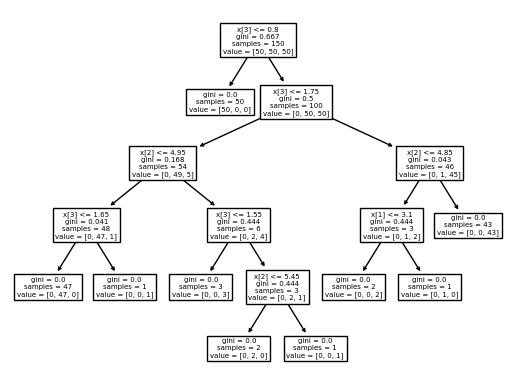

In [ ]:
tree.plot_tree(clf)

##### 1. Xây dựng cây quyết định (ID3) với bộ dữ liệu data100.csv được gửi kèm.

In [ ]:
df = pd.read_csv('data100.csv', delimiter=',')
df

,id,usd,lamphat,nctt,slkt,play
0,1,TANG,TANG,THAP,TB,CAO
1,2,TB,ON DINH,TB,CAO,THAP
2,3,TANG,ON DINH,CAO,TB,CAO
3,4,TB,GIAM,THAP,CAO,THAP
4,5,GIAM,ON DINH,CAO,THAP,THAP
...,...,...,...,...,...,...
95,96,TB,GIAM,TB,TB,CAO
96,97,GIAM,ON DINH,CAO,CAO,THAP
97,98,TB,GIAM,TB,THAP,THAP
98,99,GIAM,GIAM,TB,CAO,THAP


In [ ]:
df.columns

Index(['id', 'usd', 'lamphat', 'nctt', 'slkt', 'play'], dtype='object')

In [ ]:
for i in df.columns:
  print(df[i].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
['TANG' 'TB' 'GIAM' 'CAO']
['TANG' 'ON DINH' 'GIAM']
['THAP' 'TB' 'CAO']
['TB' 'CAO' 'THAP']
['CAO' 'THAP']


In [ ]:
# Mapping du lieu

usd_mapping = {
    'TANG': 0,
    'TB': 1,
    'GIAM': 2,
    'CAO': 3
}
lamphat_mapping = {
    'TANG': 0,
    'ON DINH': 1,
    'GIAM': 2
}
nctt_mapping = {
    'THAP': 0,
    'TB': 1,
    'CAO': 2
}
slkt_mapping = {
    'THAP': 0,
    'TB': 1,
    'CAO': 2
}
play_mapping = {
    'THAP': 0,
    'CAO': 1
}
df

,id,usd,lamphat,nctt,slkt,play
0,1,TANG,TANG,THAP,TB,CAO
1,2,TB,ON DINH,TB,CAO,THAP
2,3,TANG,ON DINH,CAO,TB,CAO
3,4,TB,GIAM,THAP,CAO,THAP
4,5,GIAM,ON DINH,CAO,THAP,THAP
...,...,...,...,...,...,...
95,96,TB,GIAM,TB,TB,CAO
96,97,GIAM,ON DINH,CAO,CAO,THAP
97,98,TB,GIAM,TB,THAP,THAP
98,99,GIAM,GIAM,TB,CAO,THAP


In [ ]:
# prompt: df mapping

df['usd'] = df['usd'].map(usd_mapping)
df['lamphat'] = df['lamphat'].map(lamphat_mapping)
df['nctt'] = df['nctt'].map(nctt_mapping)
df['slkt'] = df['slkt'].map(slkt_mapping)
df['play'] = df['play'].map(play_mapping)
df

,id,usd,lamphat,nctt,slkt,play
0,1,0,0,0,1,1
1,2,1,1,1,2,0
2,3,0,1,2,1,1
3,4,1,2,0,2,0
4,5,2,1,2,0,0
...,...,...,...,...,...,...
95,96,1,2,1,1,1
96,97,2,1,2,2,0
97,98,1,2,1,0,0
98,99,2,2,1,2,0


In [ ]:
X = df.drop(columns=['id', 'play'])
y = df[['play']]

print(X, y)

    usd  lamphat  nctt  slkt
0     0        0     0     1
1     1        1     1     2
2     0        1     2     1
3     1        2     0     2
4     2        1     2     0
..  ...      ...   ...   ...
95    1        2     1     1
96    2        1     2     2
97    1        2     1     0
98    2        2     1     2
99    1        0     0     1

[100 rows x 4 columns]     play
0      1
1      0
2      1
3      0
4      0
..   ...
95     1
96     0
97     0
98     0
99     1

[100 rows x 1 columns]


In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y)


[Text(0.5, 0.875, 'x[3] <= 1.5\ngini = 0.499\nsamples = 100\nvalue = [52, 48]'),
 Text(0.25, 0.625, 'x[0] <= 1.5\ngini = 0.475\nsamples = 62\nvalue = [38, 24]'),
 Text(0.125, 0.375, 'x[3] <= 0.5\ngini = 0.5\nsamples = 42\nvalue = [21, 21]'),
 Text(0.0625, 0.125, 'gini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(0.1875, 0.125, 'gini = 0.476\nsamples = 23\nvalue = [9, 14]'),
 Text(0.375, 0.375, 'x[2] <= 0.5\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'gini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.75, 0.625, 'x[2] <= 1.5\ngini = 0.465\nsamples = 38\nvalue = [14, 24]'),
 Text(0.625, 0.375, 'x[0] <= 0.5\ngini = 0.499\nsamples = 21\nvalue = [11, 10]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.6875, 0.125, 'gini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.875, 0.375, 'x[1] <= 1.5\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.8125, 0.125, 'gini 

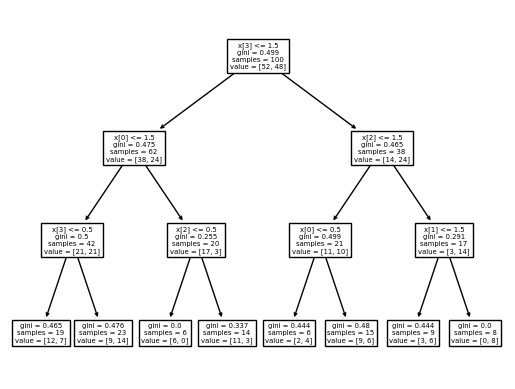

In [ ]:
tree.plot_tree(clf)

##### 2. Xây dựng cây quyết định (ID3) với bộ dữ liệu Social.csv được gửi kèm.

In [ ]:
import matplotlib.pyplot as plt


df2 = pd.read_csv('Social.csv', delimiter=',')
df2

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
# Gender mapping
gender_mapping = {
    'Male': 0,
    'Female': 1
}
df2['Gender'] = df2['Gender'].map(gender_mapping)
df2

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


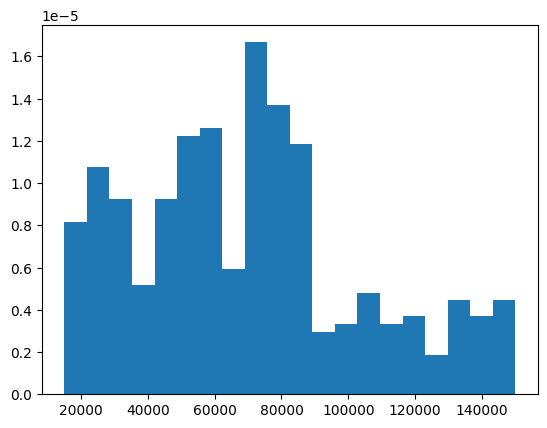

In [ ]:
plt.hist(df2['EstimatedSalary'], density=True, bins=20)
plt.show()

In [ ]:
# prompt: mapping salary in range with condition pandas

def map_salary(salary):
  if salary <= 20000:
    return 0
  elif 20000 < salary <= 40000:
    return 1
  else:
    return 2

df2['EstimatedSalary'] = df2['EstimatedSalary'].apply(map_salary)
df2


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,0,0
1,15810944,0,35,0,0
2,15668575,1,26,2,0
3,15603246,1,27,2,0
4,15804002,0,19,2,0
...,...,...,...,...,...
395,15691863,1,46,2,1
396,15706071,0,51,1,1
397,15654296,1,50,0,1
398,15755018,0,36,1,0


In [ ]:
# prompt: age mapping in range with condition

def map_age(age):
  if age <= 20:
    return 0
  elif 20 < age <= 30:
    return 1
  elif 30 < age <= 40:
    return 2
  else:
    return 3

df2['Age'] = df2['Age'].apply(map_age)
df2


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,0,0,0
1,15810944,0,2,0,0
2,15668575,1,1,2,0
3,15603246,1,1,2,0
4,15804002,0,0,2,0
...,...,...,...,...,...
395,15691863,1,3,2,1
396,15706071,0,3,1,1
397,15654296,1,3,0,1
398,15755018,0,2,1,0


In [ ]:
# Drop columns
X = df2.drop(columns=['User ID', 'Purchased'])
y = df2[['Purchased']]

print(X, y)

     Gender  Age  EstimatedSalary
0         0    0                0
1         0    2                0
2         1    1                2
3         1    1                2
4         0    0                2
..      ...  ...              ...
395       1    3                2
396       0    3                1
397       1    3                0
398       0    2                1
399       1    3                1

[400 rows x 3 columns]      Purchased
0            0
1            0
2            0
3            0
4            0
..         ...
395          1
396          1
397          1
398          0
399          1

[400 rows x 1 columns]


In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y)


[Text(0.5, 0.875, 'x[1] <= 2.5\ngini = 0.459\nsamples = 400\nvalue = [257, 143]'),
 Text(0.25, 0.625, 'x[1] <= 1.5\ngini = 0.261\nsamples = 253\nvalue = [214, 39]'),
 Text(0.125, 0.375, 'x[2] <= 1.5\ngini = 0.102\nsamples = 111\nvalue = [105, 6]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.1875, 0.125, 'gini = 0.14\nsamples = 79\nvalue = [73, 6]'),
 Text(0.375, 0.375, 'x[2] <= 1.5\ngini = 0.357\nsamples = 142\nvalue = [109, 33]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.4375, 0.125, 'gini = 0.389\nsamples = 125\nvalue = [92, 33]'),
 Text(0.75, 0.625, 'x[2] <= 1.5\ngini = 0.414\nsamples = 147\nvalue = [43, 104]'),
 Text(0.625, 0.375, 'x[0] <= 0.5\ngini = 0.145\nsamples = 38\nvalue = [3, 35]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.6875, 0.125, 'gini = 0.236\nsamples = 22\nvalue = [3, 19]'),
 Text(0.875, 0.375, 'x[0] <= 0.5\ngini = 0.465\nsamples = 109\nvalue = [40, 69]'),
 Text(0.812

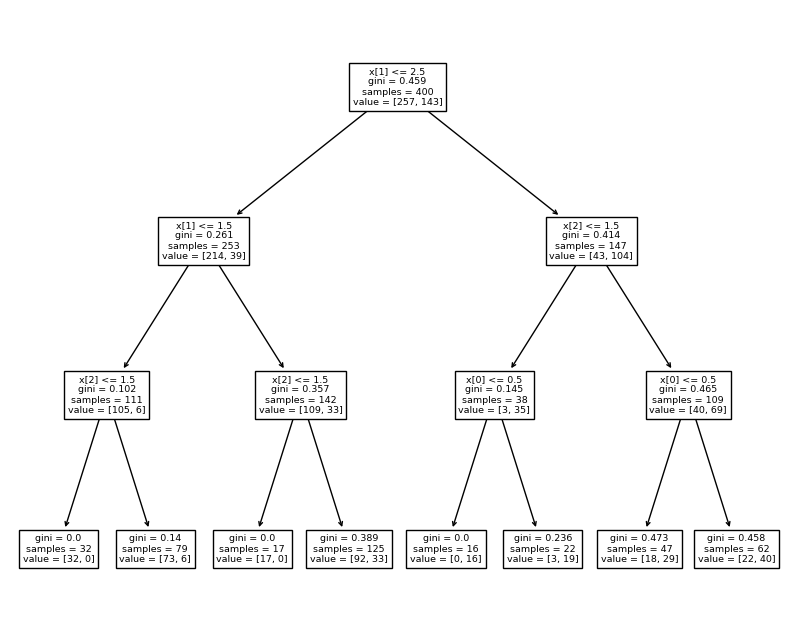

In [ ]:
plt.figure(figsize=(10, 8))
tree.plot_tree(clf)